# Environment setup

In [1]:
%pip install "numpy<1.24"
%pip install scikit-learn scikit-multiflow
%pip install seaborn

  Using cached numpy-1.23.5-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached scikit_learn-1.2.2-cp38-cp38-win_amd64.whl (8.3 MB)
  Using cached scikit_multiflow-0.5.3-cp38-cp38-win_amd64.whl (539 kB)
                                              0.0/42.2 MB ? eta -:--:--
                                              0.1/42.2 MB 3.3 MB/s eta 0:00:13
                                              0.3/42.2 MB 2.6 MB/s eta 0:00:17
                                              0.4/42.2 MB 2.9 MB/s eta 0:00:15
                                              0.6/42.2 MB 3.0 MB/s eta 0:00:15
                                              0.7/42.2 MB 3.2 MB/s eta 0:00:14
                                              0.8/42.2 MB 3.1 MB/s eta 0:00:14
                                              1.0/42.2 MB 3.1 MB/s eta 0:00:14
     -                                        1.1/42.2 MB 3.0 MB/s eta 0:00:14
     -                                        1.3/42.2 MB 3.0 MB/s eta 0:00:14
     -           

# Data analysis

## SEA Generator Stream

### Creating stream

In [1]:
from skmultiflow.data.sea_generator import SEAGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import metrics

sea_stream = SEAGenerator(classification_function = 3, balance_classes=True)
sea_stream.get_data_info()

'SEA Generator - 1 target(s), 2 classes, 3 features'

### Looking into dataframe created from partial stream data

In [2]:
df = pd.DataFrame()
N_SAMPLES = 10000

def generate_data(stream, n_features, n_samples):
    features = [[] for _ in range(n_features)]
    targets = []
    curr_samples = 0

    while curr_samples < n_samples:
        X, y = stream.next_sample()
        for i in range(n_features):
            features[i].append(X[0][0])
        targets.append(y[0])

        curr_samples += 1
    
    return features, targets

features, targets = generate_data(sea_stream, 3, N_SAMPLES)
sea_stream.restart()

df = pd.DataFrame({'Feature 1': features[0], 'Feature 2': features[1], 'Feature 3': features[2], 'Target': targets})
df.head()

Feature 1  Feature 2  Feature 3  Target
0   6.205338   6.205338   6.205338       1
1   5.776473   5.776473   5.776473       0
2   7.237264   7.237264   7.237264       1
3   1.343054   1.343054   1.343054       0
4   4.772880   4.772880   4.772880       1

### Datatypes

In [3]:
df.dtypes

Feature 1    float64
Feature 2    float64
Feature 3    float64
Target         int64
dtype: object

### Statistics

In [4]:
df.describe(include='all')

Feature 1     Feature 2     Feature 3        Target
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       4.806003      4.806003      4.806003      0.500000
std        2.907104      2.907104      2.907104      0.500025
min        0.000031      0.000031      0.000031      0.000000
25%        2.261927      2.261927      2.261927      0.000000
50%        4.725743      4.725743      4.725743      0.500000
75%        7.293388      7.293388      7.293388      1.000000
max        9.999493      9.999493      9.999493      1.000000

### Plotting distributions inside dataframe

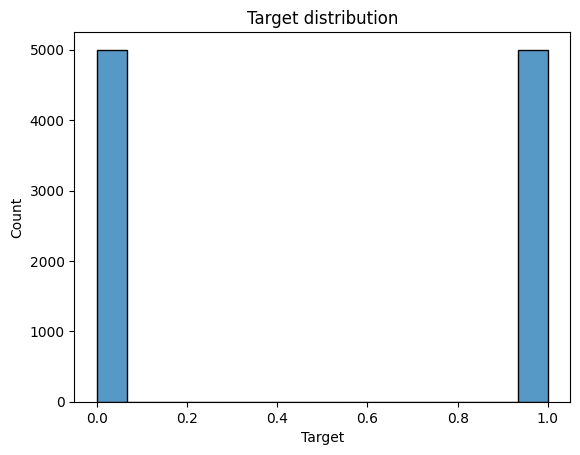

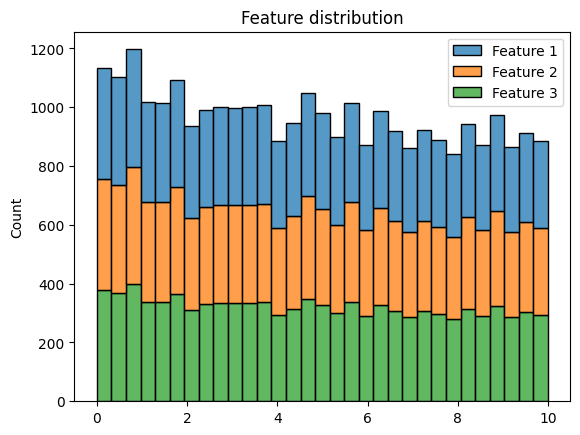

<Figure size 640x480 with 0 Axes>

In [5]:
g=sns.histplot(df['Target'])
g.set_title('Target distribution')
plt.show()
plt.savefig('target_distribution_sea_1.png', dpi=300, bbox_inches='tight')

g=sns.histplot(df.drop('Target', axis=1), multiple='stack')
g.set_title('Feature distribution')
plt.show()
plt.savefig('feature_distribution_sea_1.png', dpi=300, bbox_inches='tight')


### Plotting correlations between features

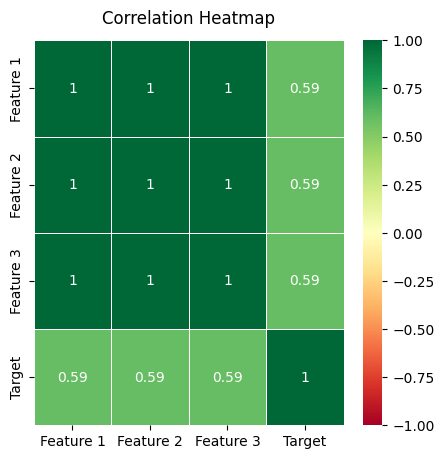

In [6]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map

g=sns.heatmap(df[top_corr_features].corr(), vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)
g.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('correlation_heatmap_sea_1.png', dpi=300, bbox_inches='tight')

### Plotting distributions after sudden drift was generated

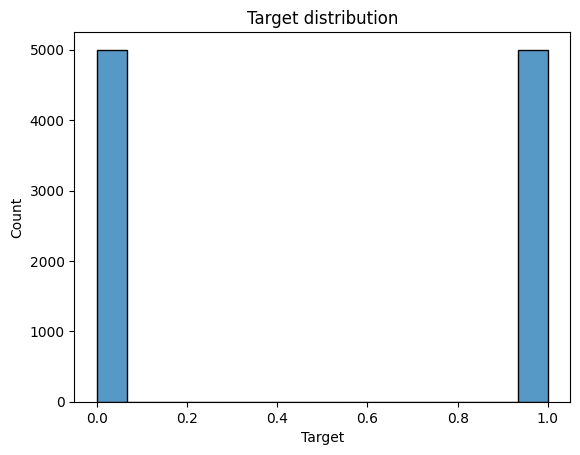

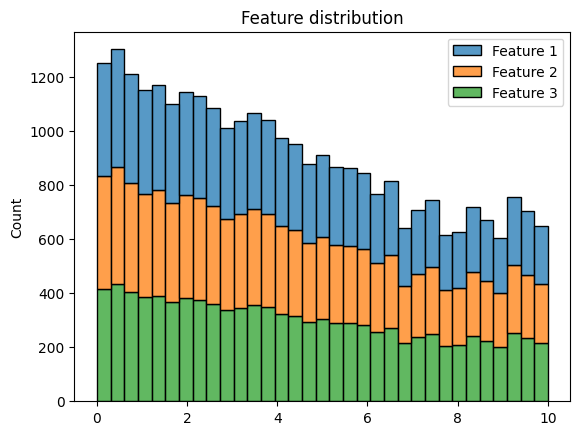

<Figure size 640x480 with 0 Axes>

In [7]:
sea_stream.generate_drift()
features, targets = generate_data(sea_stream, 3, N_SAMPLES)
df2 = pd.DataFrame({'Feature 1': features[0], 'Feature 2': features[1], 'Feature 3': features[2], 'Target': targets})

sea_stream.restart()

g=sns.histplot(df2['Target'])
g.set_title('Target distribution')
plt.show()
plt.savefig('target_distribution_sea_2.png', dpi=300, bbox_inches='tight')

g=sns.histplot(df2.drop('Target', axis=1), multiple='stack')
g.set_title('Feature distribution')
plt.show()
plt.savefig('feature_distribution_sea_2.png', dpi=300, bbox_inches='tight')

### Plotting new correlations after drift was generated

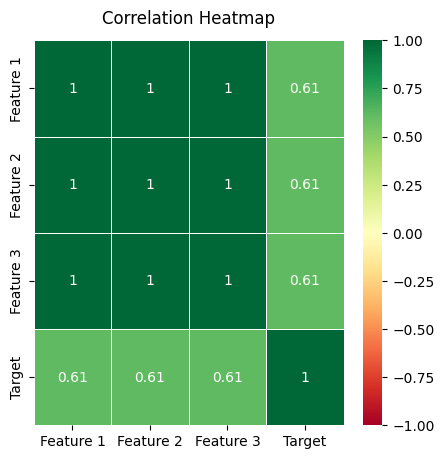

In [8]:
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map

g=sns.heatmap(df2[top_corr_features].corr(), vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)
g.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('correlation_heatmap_sea_2.png', dpi=300, bbox_inches='tight')

## Hyperplane Generator Stream

### Creating stream

In [24]:
from skmultiflow.data import HyperplaneGenerator

hyperplane_stream = HyperplaneGenerator(random_state=1, n_features=10, n_drift_features=1, mag_change=0.66, sigma_percentage=0.25)

hyperplane_stream.get_data_info()

'Hyperplane Generator - 1 target(s), 2 classes, 10 features'

### Creating dataframe from partial stream data

In [25]:
features, targets = generate_data(hyperplane_stream, 10, N_SAMPLES)

df_hyplerplane = pd.DataFrame({'Feature 1': features[0], 'Feature 2': features[1], 'Feature 3': features[2], 'Feature 4': features[3], 'Feature 5': features[4], 'Feature 6': features[5], 'Feature 7': features[6], 'Feature 8': features[7], 'Feature 9': features[8], 'Feature 10': features[9], 'Target': targets})

df_hyplerplane.head()

Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0   0.419195   0.419195   0.419195   0.419195   0.419195   0.419195   
1   0.313424   0.313424   0.313424   0.313424   0.313424   0.313424   
2   0.691877   0.691877   0.691877   0.691877   0.691877   0.691877   
3   0.908596   0.908596   0.908596   0.908596   0.908596   0.908596   
4   0.589306   0.589306   0.589306   0.589306   0.589306   0.589306   

   Feature 7  Feature 8  Feature 9  Feature 10  Target  
0   0.419195   0.419195   0.419195    0.419195       0  
1   0.313424   0.313424   0.313424    0.313424       0  
2   0.691877   0.691877   0.691877    0.691877       1  
3   0.908596   0.908596   0.908596    0.908596       1  
4   0.589306   0.589306   0.589306    0.589306       1

### Creating dataframe from next data batch

In [26]:
features_2, targets_2 = generate_data(hyperplane_stream, 10, N_SAMPLES)

df_hyplerplane_2 = pd.DataFrame({'Feature 1': features_2[0], 'Feature 2': features_2[1], 'Feature 3': features_2[2], 'Feature 4': features_2[3], 'Feature 5': features_2[4], 'Feature 6': features_2[5], 'Feature 7': features_2[6], 'Feature 8': features_2[7], 'Feature 9': features_2[8], 'Feature 10': features_2[9], 'Target': targets_2})

df_hyplerplane_2.head()

Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0   0.325503   0.325503   0.325503   0.325503   0.325503   0.325503   
1   0.322689   0.322689   0.322689   0.322689   0.322689   0.322689   
2   0.271887   0.271887   0.271887   0.271887   0.271887   0.271887   
3   0.006149   0.006149   0.006149   0.006149   0.006149   0.006149   
4   0.600069   0.600069   0.600069   0.600069   0.600069   0.600069   

   Feature 7  Feature 8  Feature 9  Feature 10  Target  
0   0.325503   0.325503   0.325503    0.325503       0  
1   0.322689   0.322689   0.322689    0.322689       0  
2   0.271887   0.271887   0.271887    0.271887       0  
3   0.006149   0.006149   0.006149    0.006149       1  
4   0.600069   0.600069   0.600069    0.600069       1

### Plotting distributions of dataframe

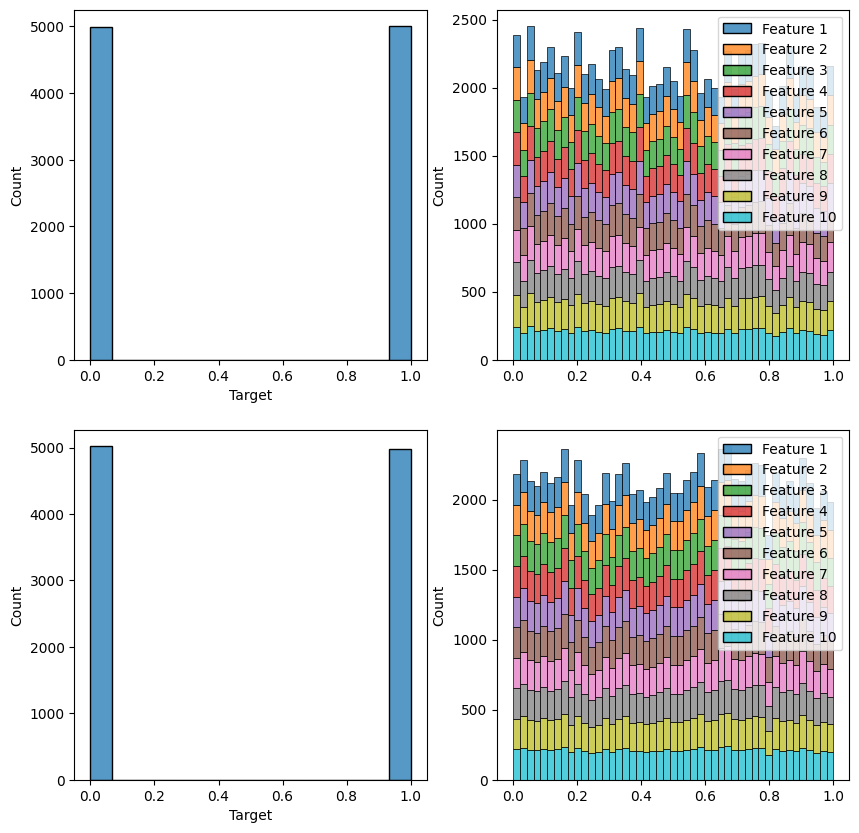

In [34]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(ax=axes[0, 0], data=df_hyplerplane['Target'])
sns.histplot(ax=axes[0, 1], data=df_hyplerplane.drop('Target', axis=1), multiple='stack')
sns.histplot(ax=axes[1, 0], data=df_hyplerplane_2['Target'])
sns.histplot(ax=axes[1, 1], data=df_hyplerplane_2.drop('Target', axis=1), multiple='stack')

plt.savefig('hyperplane_distribution.png', dpi=300, bbox_inches='tight')


### Plotting correlations

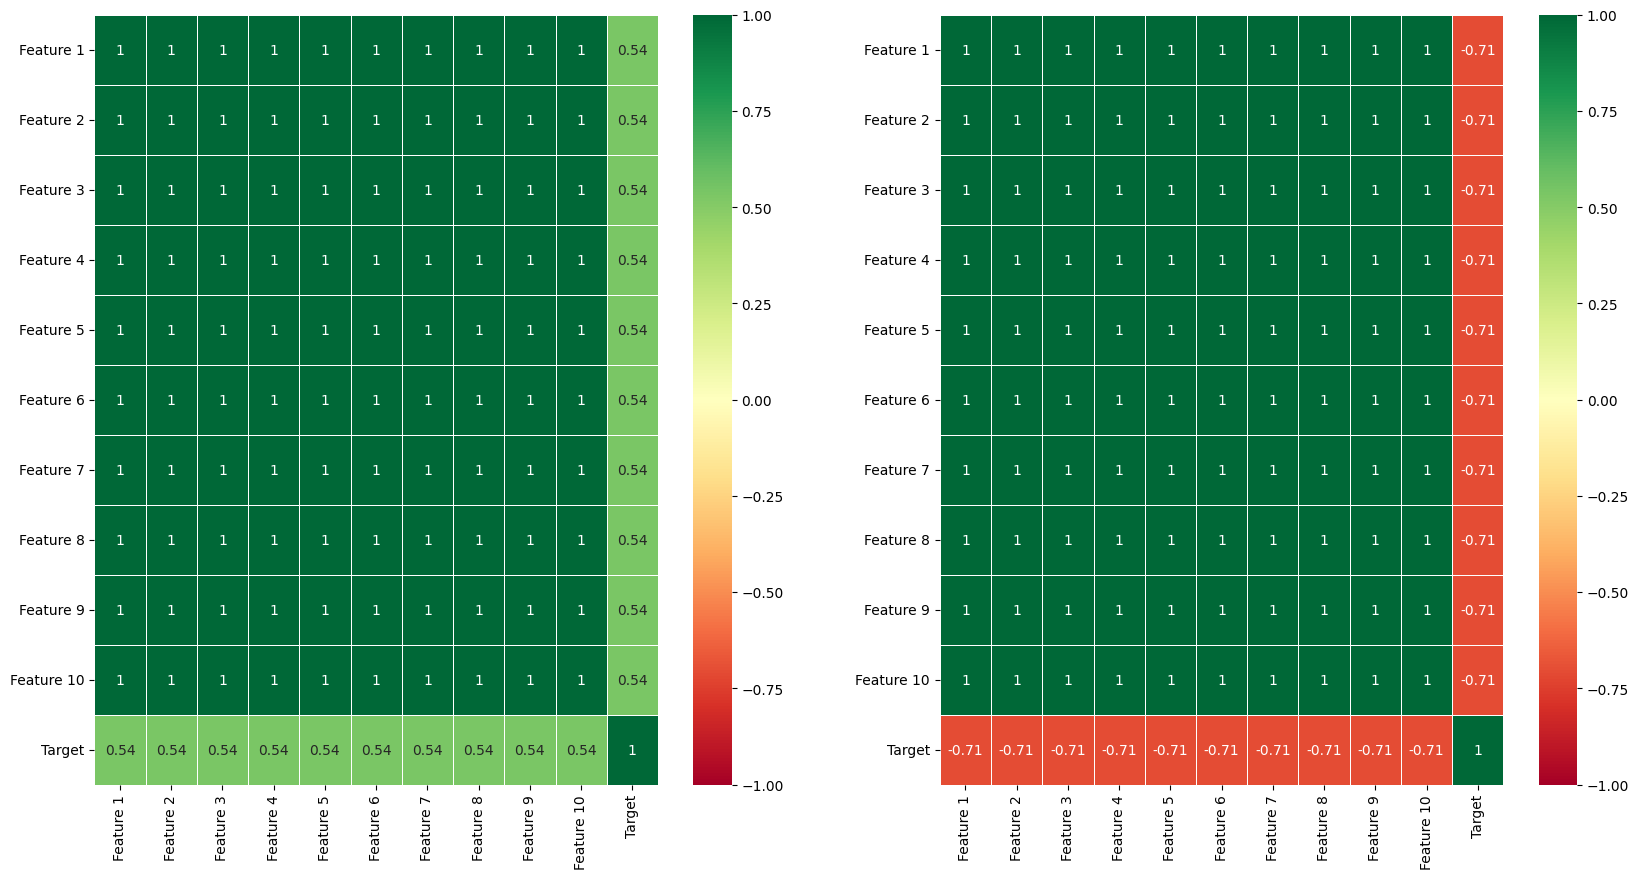

In [41]:
corrmat = df_hyplerplane.corr()
top_corr_features = corrmat.index

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(df_hyplerplane[top_corr_features].corr(), ax=axes[0], vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)

corrmat = df_hyplerplane_2.corr()
top_corr_features = corrmat.index

sns.heatmap(df_hyplerplane_2[top_corr_features].corr(), ax=axes[1], vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)

plt.savefig('hyperplane_corr.png', dpi=300, bbox_inches='tight')




## Covertype dataset analysis

### Covertype dataframe

In [44]:
from streams import build_data_stream

covertype_bunch = build_data_stream('covtype', as_data_frame=True)
covertype_df = covertype_bunch['frame']
covertype_df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   
2     2804.0   139.0    9.0                             268.0   
3     2785.0   155.0   18.0                             242.0   
4     2595.0    45.0    2.0                             153.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   
2                            65.0                           3180.0   
3                           118.0                           3090.0   
4                            -1.0                            391.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0           232.0          148.0   
1          220.0           235.0          151.0   
2          234.0           238.0          135.0   
3          238.0           238.0          122.0   
4          220.0           234.0          150.0   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                              6279.0  ...           0.0           0.0   
1                              6225.0  ...           0.0           0.0   
2                              6121.0  ...           0.0           0.0   
3                              6211.0  ...           0.0           0.0   
4                              6172.0  ...           0.0           0.0   

   Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_38  Soil_Type_39  Cover_Type  
0           0.0           0.0           5  
1           0.0           0.0           5  
2           0.0           0.0           2  
3           0.0           0.0           2  
4           0.0           0.0           5  

[5 rows x 55 columns]

### Plotting features and targets inside dataframe

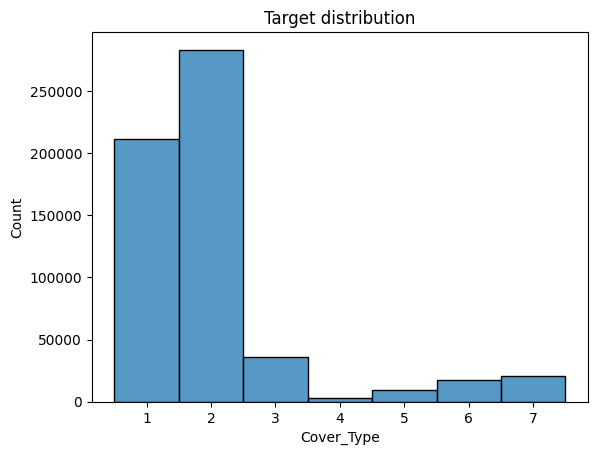

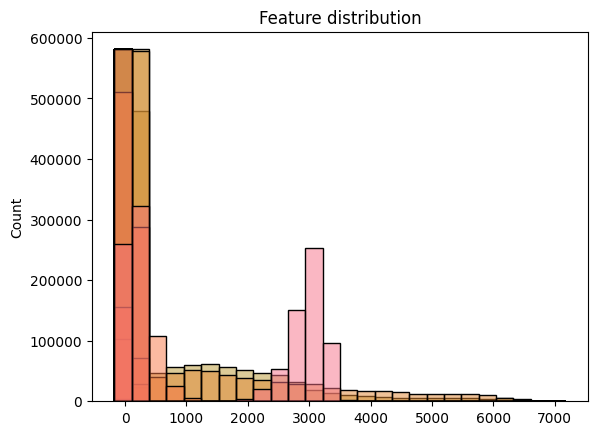

<Figure size 640x480 with 0 Axes>

In [14]:
g=sns.histplot(covertype_df['Cover_Type'], discrete=True)
g.set_title('Target distribution')
plt.show()
plt.savefig('target_distribution_covertype_1.png', dpi=300, bbox_inches='tight')

g=sns.histplot(covertype_df.drop('Cover_Type', axis=1), legend=False)
g.set_title('Feature distribution')
plt.show()
plt.savefig('feature_distribution_covertype_1.png', dpi=300, bbox_inches='tight')

### Creating covertype stream

In [74]:
from skmultiflow.data import DataStream

covertype_stream = DataStream(data=covertype_df.drop('Cover_Type', axis=1).to_numpy(), y=covertype_df['Cover_Type'].to_numpy())

covertype_stream.get_data_info()

'1 target(s), 7 classes'

### Plotting distributions of a partial stream

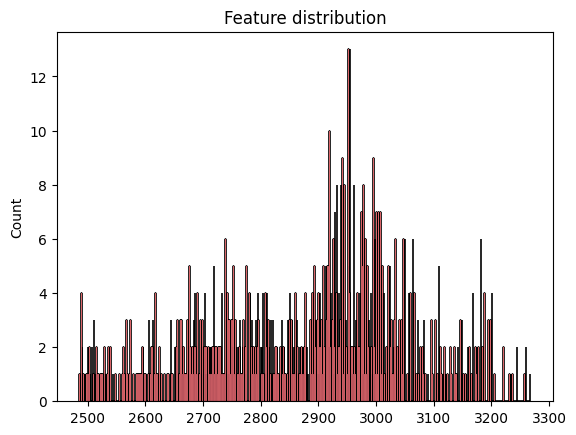

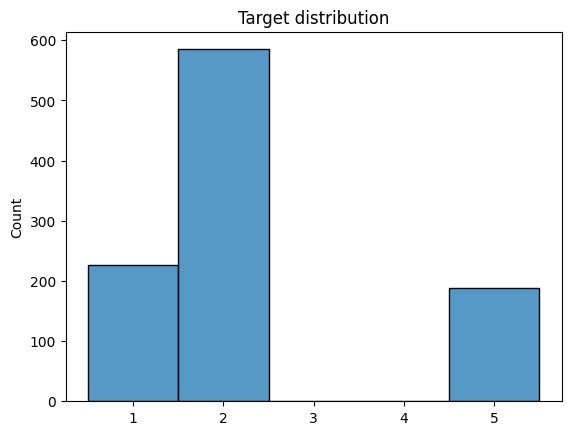

<Figure size 640x480 with 0 Axes>

In [16]:
features, targets = generate_data(covertype_stream, 54, 1000)

g=sns.histplot(features, discrete=True, legend=False)
g.set_title('Feature distribution')
plt.show()
plt.savefig('feature_distribution_covertype_stream_1.png', dpi=300, bbox_inches='tight')

g=sns.histplot(targets, discrete=True)
g.set_title('Target distribution')
plt.show()
plt.savefig('target_distribution_covertype_stream_1.png', dpi=300, bbox_inches='tight')

In [96]:
from sklearn.metrics import classification_report

def fully_fit_experiment_loop(classifier, n_samples, n_features, stream):
    curr_samples = 0
    predicted_Y = []
    true_Y = []

    while curr_samples < n_samples and stream.has_more_samples():
        X, y = stream.next_sample()

        prediction  = classifier.predict(X)
        predicted_Y.append(prediction[0])
        true_Y.append(y[0])

        #classifier.partial_fit(X, y, classes=stream.target_values)
        curr_samples += 1

    return predicted_Y, true_Y
   
def show_classification_report(predicted_Y, true_Y):
    unique_Y = np.unique(np.concatenate((predicted_Y, true_Y)))
    metrics = classification_report(true_Y, predicted_Y, labels=unique_Y, output_dict=True)
    metrics_df = pd.DataFrame(metrics).transpose()

    g=sns.heatmap(metrics_df, vmin=0, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)
    g.set_title('Classification Report', fontdict={'fontsize':12}, pad=12)
    
    gmean = np.sqrt(metrics_df['precision']['weighted avg'] * metrics_df['recall']['weighted avg'])
    print('Gmean: ', gmean)
    print(metrics_df)

    return metrics, g

Gmean:  0.4423271579863577
              precision    recall  f1-score       support
1              0.804347  0.206240  0.328301  134751.00000
2              0.471440  0.340085  0.395132  111831.00000
3              0.553233  0.662966  0.603149   22158.00000
4              0.054918  0.881416  0.103395     565.00000
5              0.038542  0.447951  0.070976    3929.00000
6              0.032316  0.129710  0.051741    9953.00000
7              0.235419  0.889728  0.372323   16813.00000
accuracy       0.330070  0.330070  0.330070       0.33007
macro avg      0.312888  0.508299  0.275002  300000.00000
weighted avg   0.592763  0.330070  0.363012  300000.00000


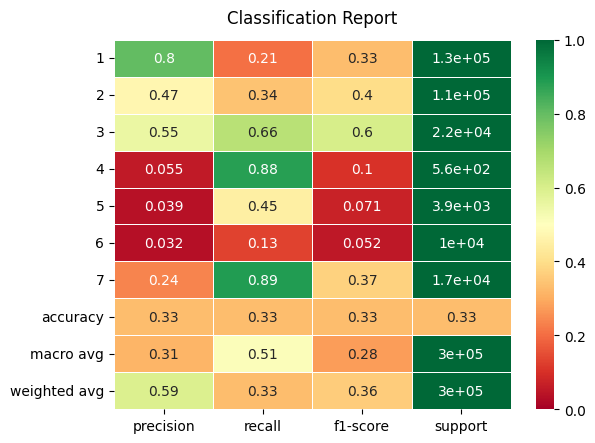

In [99]:
from skmultiflow.drift_detection import DDM, ADWIN
from skmultiflow.drift_detection.eddm import EDDM
from sklearn.naive_bayes import GaussianNB
from skmultiflow.meta import AccuracyWeightedEnsembleClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

covertype_stream.restart()

classifier = GaussianNB()
X, y = covertype_stream.next_sample(250000)
classifier.fit(X, y)
predicted_Y, true_Y = fully_fit_experiment_loop(classifier, 300000, 54, covertype_stream)

metrics_gnb, g_gnb = show_classification_report(predicted_Y, true_Y)

In [100]:
from sklearn.neural_network import MLPClassifier

covertype_stream.restart()

classifier = MLPClassifier(random_state=1, max_iter=300)
X, y = covertype_stream.next_sample(250000)
classifier.fit(X, y)

MLPClassifier(max_iter=300, random_state=1)

Gmean:  0.6024608168477043
              precision    recall  f1-score        support
1              0.708472  0.588241  0.642782  134751.000000
2              0.591533  0.518041  0.552353  111831.000000
3              0.661698  0.719153  0.689230   22158.000000
4              0.142776  0.893805  0.246221     565.000000
5              0.086786  0.443624  0.145171    3929.000000
6              0.359537  0.520647  0.425347    9953.000000
7              0.466184  0.778148  0.583060   16813.000000
accuracy       0.578823  0.578823  0.578823       0.578823
macro avg      0.430998  0.637380  0.469166  300000.000000
weighted avg   0.627064  0.578823  0.594679  300000.000000


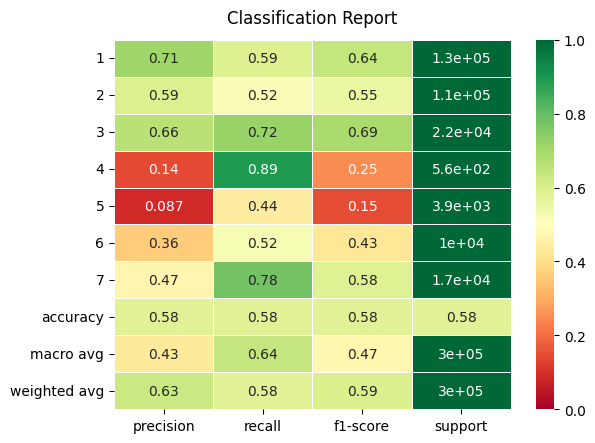

In [101]:
predicted_Y, true_Y = fully_fit_experiment_loop(classifier, 300000, 54, covertype_stream)

metrics_mlp, g_mlp = show_classification_report(predicted_Y, true_Y)

<Axes: >

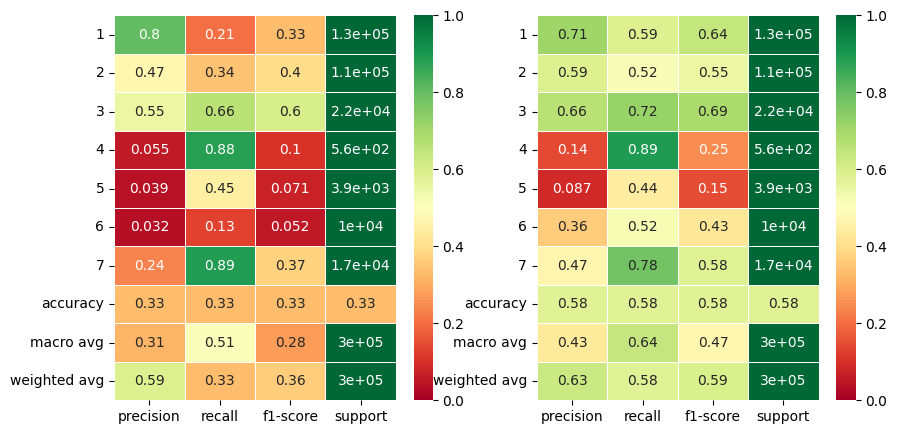

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(pd.DataFrame(metrics_gnb).transpose(), vmin=0, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5, ax=axes[0])
sns.heatmap(pd.DataFrame(metrics_mlp).transpose(), vmin=0, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5, ax=axes[1])

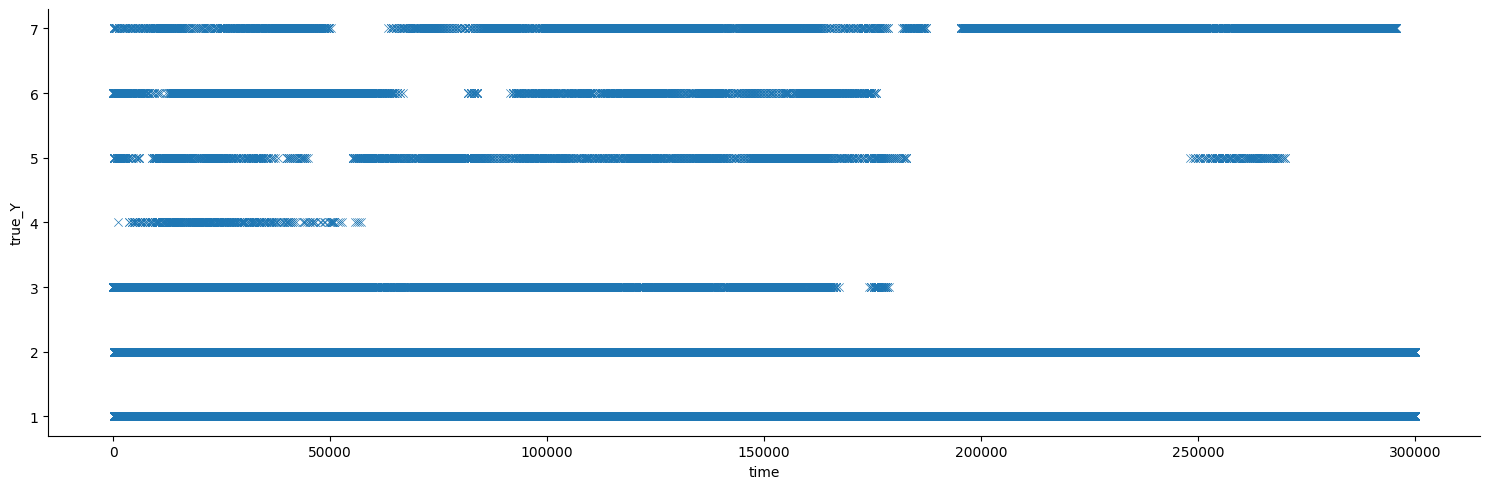

In [118]:
# make wide plot of true_Y on y axis and time on x axis using 'o' marker
sns.relplot(data=pd.DataFrame({'true_Y': true_Y, 'time': range(len(true_Y))}), x='time', y='true_Y', marker='x', aspect=3)

#### SEA Generator Drift Analysis

e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide

Warning zone has been detected in data: 696 - of index: 696
Warning zone has ended in data: 703 - of index: 703
Warning zone has been detected in data: 705 - of index: 705
Warning zone has ended in data: 721 - of index: 721
Change has been detected in data: 721 - of index: 721


e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide

Warning zone has been detected in data: 1787 - of index: 1787
Warning zone has ended in data: 1788 - of index: 1788
Warning zone has been detected in data: 1791 - of index: 1791
Warning zone has ended in data: 1796 - of index: 1796
Warning zone has been detected in data: 1821 - of index: 1821
Warning zone has ended in data: 1853 - of index: 1853
Warning zone has been detected in data: 1854 - of index: 1854
Warning zone has ended in data: 1868 - of index: 1868
Change has been detected in data: 1868 - of index: 1868


e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide

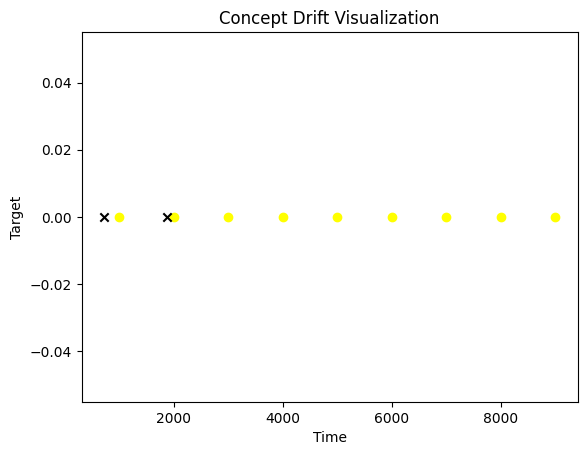

              precision    recall  f1-score     support
1              0.137500  1.000000  0.241758   1375.0000
2              0.000000  0.000000  0.000000   1462.0000
3              0.000000  0.000000  0.000000   1262.0000
4              0.000000  0.000000  0.000000   1620.0000
5              0.000000  0.000000  0.000000   1583.0000
6              0.000000  0.000000  0.000000   1349.0000
7              0.000000  0.000000  0.000000   1349.0000
accuracy       0.137500  0.137500  0.137500      0.1375
macro avg      0.019643  0.142857  0.034537  10000.0000
weighted avg   0.018906  0.137500  0.033242  10000.0000


e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [17]:
from skmultiflow.drift_detection import DDM, ADWIN
from skmultiflow.drift_detection.eddm import EDDM
from sklearn.naive_bayes import GaussianNB
from skmultiflow.meta import AccuracyWeightedEnsembleClassifier
from sklearn.metrics import classification_report

sea_stream.reset()

drift_detector = DDM(warning_level=2.8, min_num_instances=50) 
clf = GaussianNB()
clf2 = AccuracyWeightedEnsembleClassifier(n_estimators = 10, base_estimator = GaussianNB(), n_splits=None)

N_SAMPLES = 10000
curr_samples = 0
actual_drift_points = [1000 * n for n in range(1, 10)]
guessed_predictions = []
drift_points = []
features = [[] for _ in range(54)]
targets = []
last_X_window = []
last_y_window = []

X, y = covertype_stream.next_sample(1)
clf.partial_fit(X, y, classes=[i+1 for i in range(7)])
in_warning_zone = False

sea_stream.generate_drift()

while curr_samples < N_SAMPLES and covertype_stream.has_more_samples():
    #if curr_samples in actual_drift_points:
    #    sea_stream.generate_drift()

    X, y = covertype_stream.next_sample()

    prediction = clf.predict(X)

    guessed_predictions.append(prediction[0])

    for i in range(54):
        features[i].append(X[0][i])
    targets.append(y[0])
    drift_detector.add_element(1 - int(y[0] == prediction[0]))
    if not in_warning_zone and drift_detector.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(curr_samples) + ' - of index: ' + str(curr_samples))
        in_warning_zone = True
    elif in_warning_zone and not drift_detector.detected_warning_zone():
        print('Warning zone has ended in data: ' + str(curr_samples) + ' - of index: ' + str(curr_samples))
        in_warning_zone = False
    if drift_detector.detected_change():
        print('Change has been detected in data: ' + str(curr_samples) + ' - of index: ' + str(curr_samples))
        # clf = GaussianNB()
        # clf.partial_fit(np.array(last_X_window).reshape(-1, 54), np.array(last_y_window).reshape(len(last_y_window)), classes=[i+1 for i in range(7)])
        
        drift_points.append(curr_samples)


    last_X_window.append(X)
    last_y_window.append(y)

    clf.partial_fit(X, y)

    if len(last_X_window) > 500:
        last_X_window.pop(0)
        last_y_window.pop(0)
    
    curr_samples += 1

kwargs = {'Feature ' + str(i): features[i] for i in range(54)}
df = pd.DataFrame(kwargs)
df.head()

plt.scatter(actual_drift_points, [0 for i in actual_drift_points], color='yellow', marker='o')
plt.scatter(drift_points, [0 for i in drift_points], color='black', marker='x')
plt.xlabel('Time')
plt.ylabel('Target')
plt.title('Concept Drift Visualization')
plt.show()

metrics = classification_report(targets, guessed_predictions, target_names=[str(i+1) for i in range(7)], output_dict=True)
print(pd.DataFrame(metrics).transpose())

In [ ]:

from streams import *
from skmultiflow.data import ConceptDriftStream
from skmultiflow.data import HyperplaneGenerator
from skmultiflow.data import LEDGeneratorDrift

stream = build_data_stream('covtype')


#### Create the ensemble

In [4]:
from ensemble import build_premade_ensemble, build_custom_ensemble
from sklearn.naive_bayes import GaussianNB

ensemble = build_premade_ensemble('batch', 10, GaussianNB())

#### Utilize drift detection methods

#### Evaluate

In [1]:
from skmultiflow.evaluation import EvaluatePrequential

evaluator = EvaluatePrequential(
    n_wait = 10,
    max_samples = 100,
    show_plot = False,
    metrics=['accuracy', 'running_time', 'accuracy', 'precision', 'gmean'],
    data_points_for_classification=False
)

evaluator.evaluate(stream=sea_stream, model=[ensemble], model_names=['ensemble'])

NameError: name 'sea_stream' is not defined